[참조1](https://www.youtube.com/watch?v=ixGZ0tg_lqs)  
[참조2](https://velog.io/@developerkerry/%EB%AF%B8%EB%B6%84%EA%B3%BC-%EA%B8%B0%EC%9A%B8%EA%B8%B0)

## 신경망 학습의 지표는 손실함수
신경망 학습의 핵심은 최적의 가중치와 편향을 찾는 것이라고 했다. 현재 최적인가를 확인할 수 있는 지표가 바로 손실함수.  
> 정리하면 최적의 가중치와 편향 값을 찾으면, 손실함수의 값은 최소로 작은 값이 된다.  

어떻게 매개변수를 갱신할 것인가? 바로 미분을 통해서.

## 수학적 미분(해석적 미분)
미분은 특정 순간의 변화량을 구하는 것으로 다음과 같다.
<img src="img/deep_learning_images/e_4.4.png" width=320 height=320>

좌변은 $f(x)$의 $x$에 대한 미분으로, $x$의 작은 변화가 함수 $f(x)$를 얼마나 변화시키는가를 의미한다.  
이때 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미로 $\displaystyle\lim_{h->0}$ 로 나타낸다.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 수치 미분(numerical differentiation)
def numerical_diff1(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

## 구현상 한계
극한이라는 엄청나게 작은 값을 구현하고자 10e-50이라는 값을 지정해주었다.  
하지만 이는 컴퓨터 메모리에서 표현할 수 있는 범위를 넘어섰기 때문에 아주아주 작은 값이 아니라 0이 되어버린다.(이를 반올림 오차라고함)

In [3]:
print(np.float16(10e-50))
print(np.float32(10e-50))
print(np.float64(10e-50))

0.0
0.0
1e-49


따라서 우리가 수학적으로 이용하는 미분은 코드 구현시 오차가 발생할 수 밖에 없게 되고, 최대한 수학적 미분과 근사값이 되도록 구현을 수정한다.

In [4]:
def numerical_diff2(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

식 $y=0.01x^2+0.1x$을 미분해서 확인해보자. 일단 수학 수업시간에 배운 미분을 적용했을 때 결과는 $0.02x+0.1$.  
$x=5$라고 하면 결과 값은 0.2.

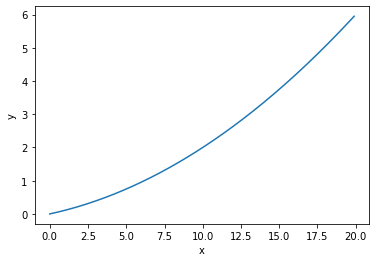

In [5]:
def func_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [6]:
print("해석적 미분 값 : ", numerical_diff1(func_1, 5))
print("수치 미분 값 : ", numerical_diff2(func_1, 5))

해석적 미분 값 :  0.0
수치 미분 값 :  0.1999999999990898


결과로 보면 해석적 미분 값은 0.2를 넘었다고 볼 수 있고, 수치 미분 값은 0.2에 한없이 가깝기에 0.2로 볼 수 있다.  
위에서 말한 h가 0에 한없이 가까움을 구현하는 한계가 있기 때문에 발생하는 오차라고 볼 수 있다.

## 편미분
변수가 여러 개 있을 때 미분하는 방법으로 실제 신경망에선 여러 개의 가중치가 존재하므로 각각의 가중치 변화에 따른 손실함수 변화를 구하기 위함.  

$f(x_0, x_1) = x_0^2 + x_1^2$

In [7]:
def func_2(x):
    return x[0]**2 + x[1] ** 2

위 식에서 미분을 하려고 하는데, 어떤 변수에 대한 미분인가??  
우선은 주어진 식처럼 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.
$\frac{\partial f}{\partial x_0}$ $\frac{\partial f}{\partial x_1}$

예제 1. $x_0$=3, $x_1$=4 일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하라

In [8]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [9]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

예제 2. $x_0=3, x_1=4$일 때, $x_1$에 대한 편미분 $\frac {\partial f}{\partial x_1}$를 구하라

In [10]:
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

위 예제에서 볼 수 있듯, 편미분은 여러 변수 중 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

## 기울기

모든 변수(가중치)의 편미분을 벡터로 나타낸 것을 기울기(Gradient)라고 한다.  

$x_0=3, x_1=4$일 때, $(x_0, x_1)$ 두 변수의 편미분을 묶어서 $(\frac {\partial f}{\partial x_0}, \frac {\partial f}{\partial x_1})$을 계산해보면

In [11]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        
    return grad

numerical_gradient(f,x) 함수의 인수인 f는 함수이고, x는 넘파이 배열이므로,  
넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다. 예를 들어 세 점(3, 4), (0, 2), (3, 0)에서의 기울기를 구한다고 하면,

for문 내부에서 x의 첫 번째 요소에 대한 중심 차분을 이용한 수치 미분, 두 번째 요소에 대한 중심 차분을 이용한 수치 미분...을 각각 수행하여 기울기 벡터가 담겨 반환될 grad에 하나씩 담는다.



In [12]:
print(numerical_gradient(func_2, np.array([3.0, 4.0])))
print(numerical_gradient(func_2, np.array([0, 2.0])))
print(numerical_gradient(func_2, np.array([3.0, 0])))

[6. 8.]
[0. 4.]
[6. 0.]


지금까지의 내용을 종합해보면 신경망이 보유하고 있는 가중치 매개변수의 값을 갱신했을 때, 손실함수 값이 최소가 되도록 해야하며,  
갱신이라는 변화를 주는 것이 바로 편미분을 통한 기울기를 구하여, 손실 함수가 가장 작은 값이 되는 쪽으로 가중치 매개변수 값을 바꾸는 것이다.

또, 지금까지의 구현에서는 단순 1차 함수나 2차 함수를 적용했지만, 실제로 신경망에 도입하게 되면 손실 함수를 적용할 것이다.  
이렇게 하면 다음 목적을 달성할 수 있는 것이다.
> 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수값이 최소가 되도록 만들자.

In [22]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)

# print(x0) # start : -2, end : 2.5 step : 0.25

In [23]:
X, Y = np.meshgrid(x0, x1)
# print(X.shape)
# print(X)

In [24]:
X = X.flatten()
Y = Y.flatten()
# print(X.shape)
# print(X)

In [18]:
def function_2(x):    
    if x.ndim == 1:
        return np.sum(x**2)
        
    else:
        return np.sum(x**2, axis=1)        

In [19]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

def numerical_gradient(f, X):    
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [20]:
grad = numerical_gradient(function_2, np.array([X, Y]))

No handles with labels found to put in legend.


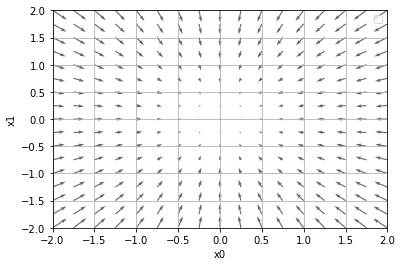

In [21]:
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

기울기를 방향을 가진 벡터(화살표)로 그려본 그림이다. 즉 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.